<a href="https://colab.research.google.com/github/richy1996/Springboard_capstone3/blob/main/music_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!sudo apt install -y fluidsynth

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libx

In [2]:
!pip install --upgrade pyfluidsynth

In [3]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 5.3 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=b1009c4b9bd6857d97d6dfb5da875e5e66f2bfd6cc01ba5771b3c386247e4a56
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [2]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

# EDA

- Read data from disk, convert to tabular data and do exploratory data analysis

In [ ]:
# copy the midis.zip file from google drive to current directory
!cp /content/drive/MyDrive/midis.zip /content/

In [ ]:
# unzip the midis.zip file
!unzip /content/midis.zip

Archive:  /content/midis.zip
   creating: content/midis/
  inflating: content/midis/op87_04b.mid  
  inflating: content/midis/waltz_08.mid  
  inflating: content/midis/poissons.mid  
  inflating: content/midis/op6n09m4.mid  
  inflating: content/midis/maz25n3.mid  
  inflating: content/midis/bydlo.mid  
  inflating: content/midis/kinder5.mid  
  inflating: content/midis/rachmm6.mid  
  inflating: content/midis/waltz_03.mid  
  inflating: content/midis/dsch10-2.mid  
  inflating: content/midis/tristes2.mid  
  inflating: content/midis/hans3a.mid  
  inflating: content/midis/hmwoo23b.mid  
  inflating: content/midis/op6n08m3.mid  
  inflating: content/midis/satieson.mid  
  inflating: content/midis/beeth9-1.mid  
  inflating: content/midis/hmcello1.mid  
  inflating: content/midis/chpson3d.mid  
  inflating: content/midis/suite_3.mid  
  inflating: content/midis/adelina.mid  
  inflating: content/midis/schumann.mid  
  inflating: content/midis/bwv977.mid  
  inflating: content/midis/vs2-

In [ ]:
filenames = glob.glob("/content/content/midis/*.mid")
print('Number of files:', len(filenames))

Number of files: 1325


## Process a MIDI file

First, use ```pretty_midi``` to parse a single MIDI file and inspect the format of the notes.


In [ ]:
sample_file = filenames[1]
# sample_file = "/content/for_elise_by_beethoven.mid"
print(sample_file)

/content/content/midis/blute.mid


Generate a `PrettyMIDI` object for the sample MIDI file.

In [ ]:
pm = pretty_midi.PrettyMIDI(sample_file)
pm

/usr/local/lib/python3.10/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Play the sample file.

In [ ]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [ ]:
display_audio(pm)

Do some inspection on the MIDI file.

In [ ]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 8
Instrument name: Oboe


## Extract notes

In [ ]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=82, note_name=A#5, duration=0.1639
1: pitch=87, note_name=D#6, duration=0.1639
2: pitch=87, note_name=D#6, duration=0.1639
3: pitch=82, note_name=A#5, duration=0.1639
4: pitch=82, note_name=A#5, duration=0.6917
5: pitch=84, note_name=C6, duration=0.3583
6: pitch=86, note_name=D6, duration=0.3306
7: pitch=87, note_name=D#6, duration=0.6917
8: pitch=91, note_name=G6, duration=0.3583
9: pitch=87, note_name=D#6, duration=0.6917


3 variables to represent a note when training the model: `pitch`, `step` and `duration`. The pitch is the perceptual quality of the sound as a MIDI note number.
The `step` is the time elapsed from the previous note or start of the track.
The `duration` is how long the note will be playing in seconds and is the difference between the note end and note start times.


Extract the notes from the sample MIDI file.

In [ ]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [ ]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

,pitch,start,end,step,duration
0,71,25.263136,25.649649,0.000000,0.386513
1,73,25.657872,26.439122,0.394736,0.781249
2,70,26.447346,26.833858,0.789473,0.386513
3,71,26.842082,27.623331,0.394737,0.781249
4,74,31.578920,31.965433,4.736838,0.386513


In [ ]:
raw_notes.tail()

,pitch,start,end,step,duration
1063,71,165.642885,165.857170,0.214286,0.214286
1064,45,165.857170,167.142885,0.214286,1.285715
1065,33,165.857170,167.142885,0.000000,1.285715
1066,60,165.857170,167.142885,0.000000,1.285715
1067,69,165.857170,167.142885,0.000000,1.285715


To more easily interpret pitches, I'll convert them to note names rather than the pitches.
The note name shows the type of note, accidental and octave number
(e.g. C#4).

In [ ]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['B4', 'C#5', 'A#4', 'B4', 'D5', 'E5', 'C#5', 'D5', 'F5', 'E5'],
      dtype='<U3')

To visualize the musical piece, plot the note pitch, start and end across the length of the track (i.e. piano roll). Start with the first 100 notes

In [ ]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

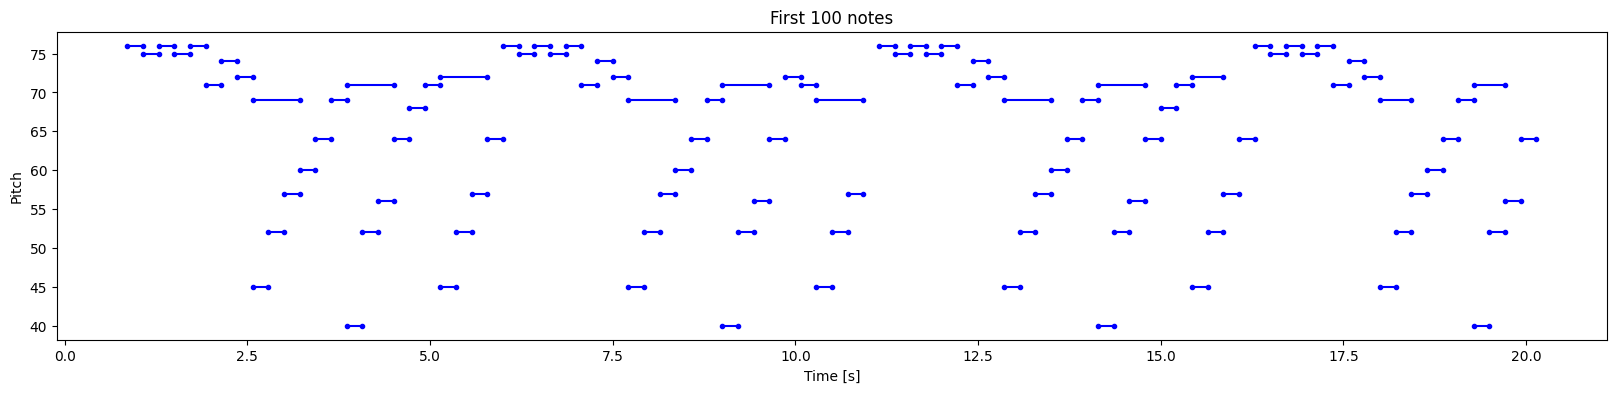

In [ ]:
plot_piano_roll(raw_notes, count=100)

Plot the notes for the entire track.

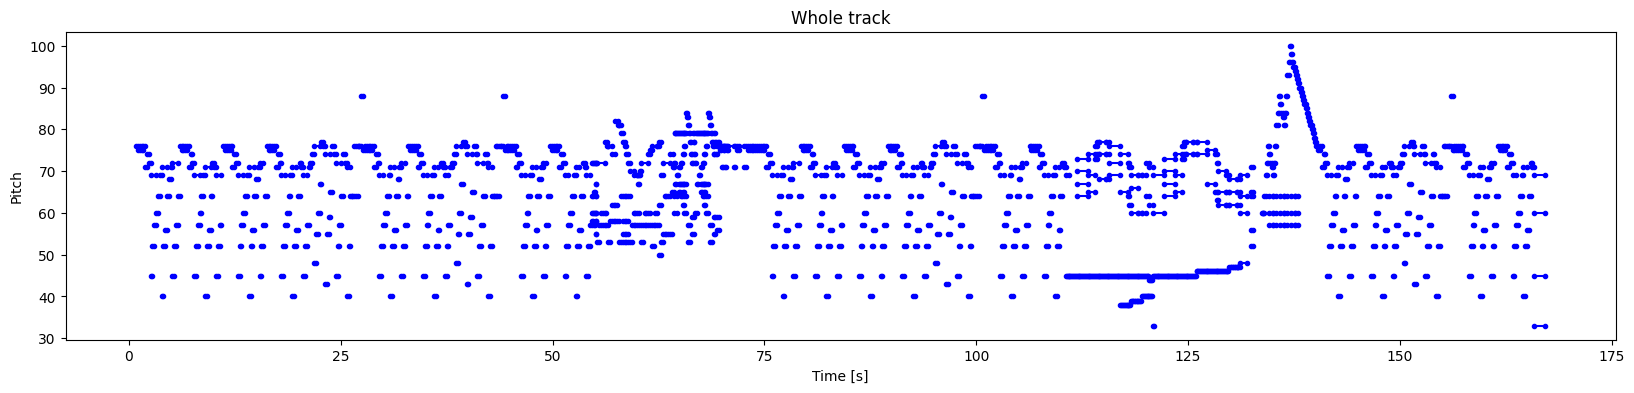

In [ ]:
plot_piano_roll(raw_notes)

Check the distribution of each note variable.

In [ ]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

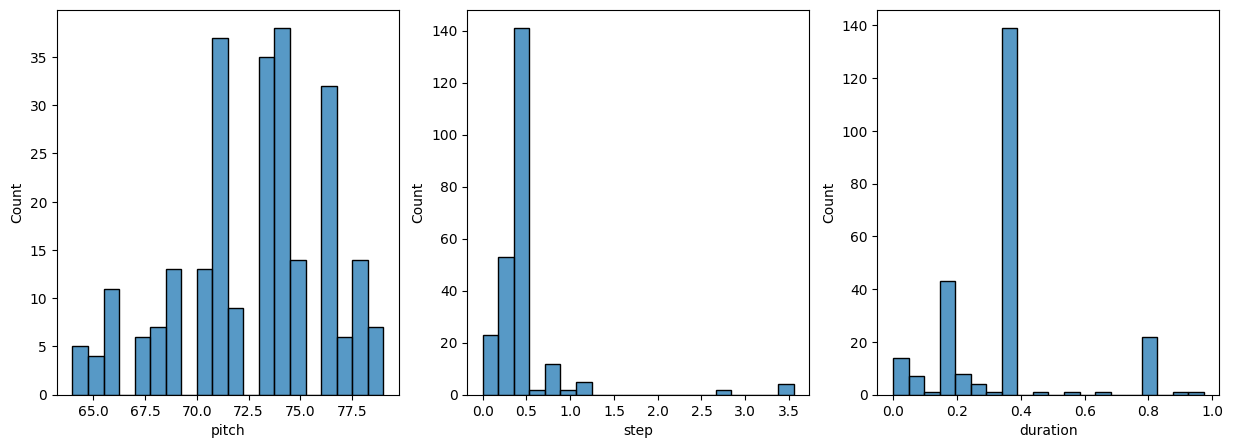

In [ ]:
plot_distributions(raw_notes)

## Create the training dataset


Create the training dataset by extracting notes from the MIDI files.

In [ ]:
%%time
# num_files = 5
all_notes = []
# temp = ["/content/for_elise_by_beethoven.mid"]
for f in filenames:

# for f in filenames[:num_files]:
# for f in temp:
    try:
        notes = midi_to_notes(f)
    except Exception as e:
        print(e)
        print(f)
        continue
    all_notes.append(notes)



In [ ]:
len(filenames), len(all_notes)

(1325, 1235)

In [ ]:
for i in all_notes:
    if i.shape[0] == 0:
        print(i)
    if i.shape[1] != 5:
        print(i)

In [5]:
# connect to your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# file_path = '/content/drive/MyDrive/Springboard/Capstone 3/all_notes.csv'

# all_notes = pd.read_csv(file_path).drop(columns=['Unnamed: 0'])
# all_notes.head()

In [ ]:
all_notes = pd.concat(all_notes)
all_notes

,pitch,start,end,step,duration
0,39,2.000000,5.737980,0.000000,3.737980
1,43,5.749999,5.882211,3.749999,0.132212
2,46,5.894230,6.026442,0.144231,0.132212
3,51,6.038461,6.170673,0.144231,0.132212
4,55,6.182692,6.314903,0.144231,0.132212
...,...,...,...,...,...
52,65,68.858073,69.494792,1.218750,0.636719
53,65,69.497396,69.964844,0.639323,0.467448
54,65,69.967448,70.506510,0.470052,0.539062
55,65,70.808594,74.108073,0.841146,3.299479


In [8]:
all_notes.isna().sum()

pitch       0
start       0
end         0
step        0
duration    0
dtype: int64

In [9]:
# descriptive statistics
all_notes.describe()

,pitch,start,end,step,duration
count,1.570367e+06,1.570367e+06,1.570367e+06,1.570367e+06,1.570367e+06
mean,6.692555e+01,3.055207e+02,3.057959e+02,2.203416e-01,2.752374e-01
std,1.267325e+01,3.558646e+02,3.558575e+02,1.327640e+00,4.282579e-01
min,0.000000e+00,0.000000e+00,3.472219e-02,0.000000e+00,5.990104e-04
25%,5.900000e+01,7.850228e+01,7.879384e+01,3.676467e-03,9.791667e-02
50%,6.800000e+01,1.812500e+02,1.815354e+02,1.083333e-01,1.541667e-01
75%,7.600000e+01,3.936678e+02,3.939444e+02,2.142855e-01,2.916664e-01
max,1.190000e+02,3.304736e+03,3.306611e+03,7.240340e+02,9.971144e+01


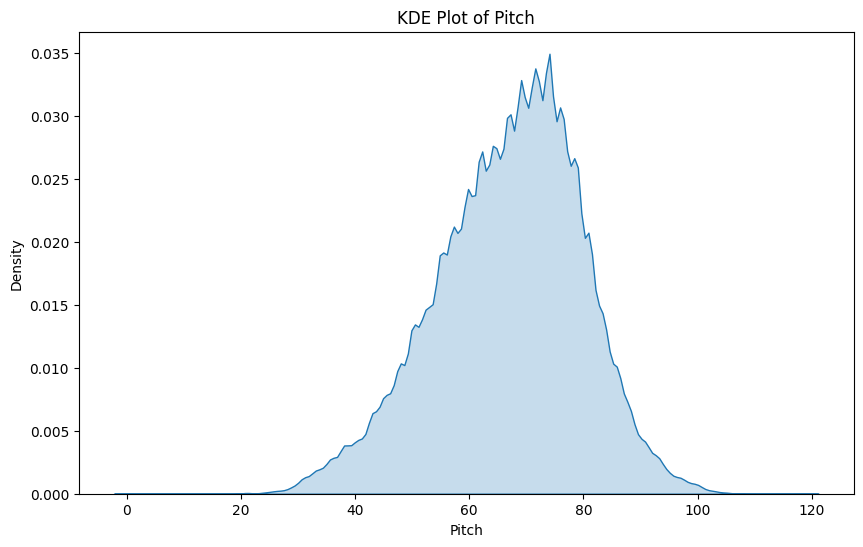

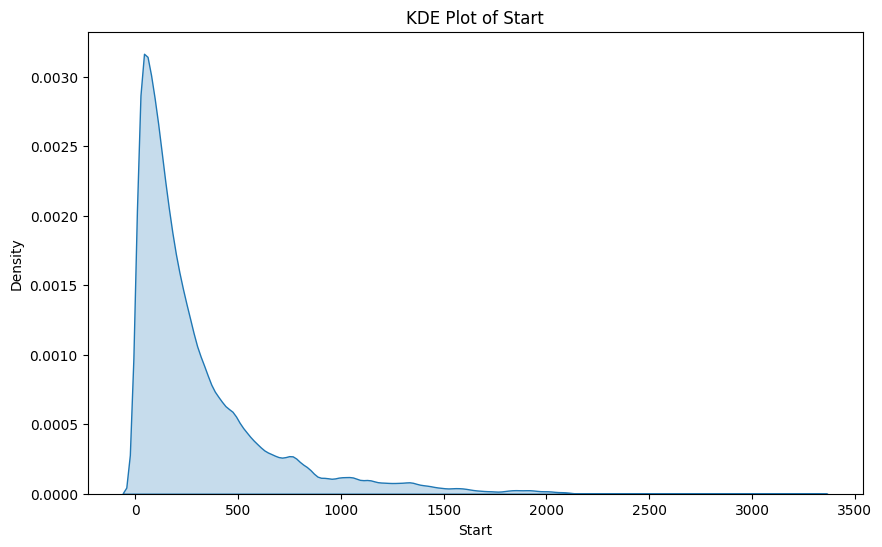

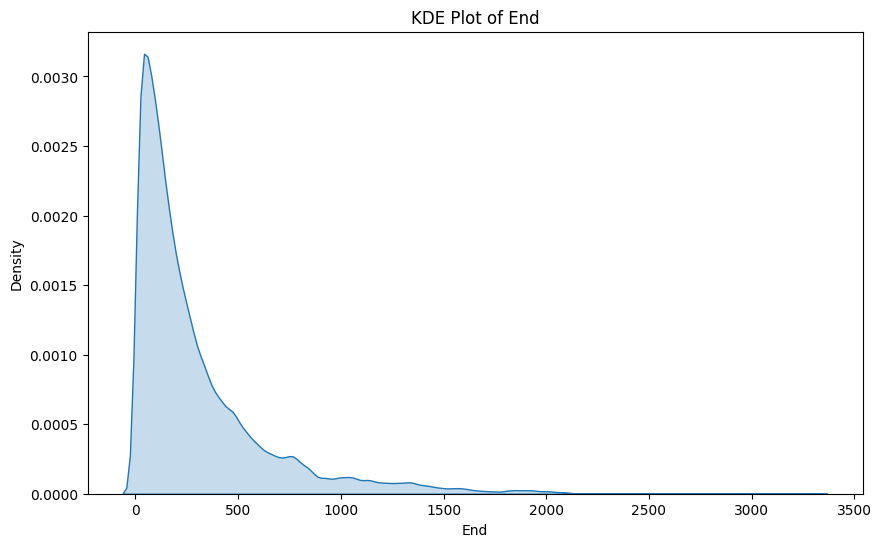

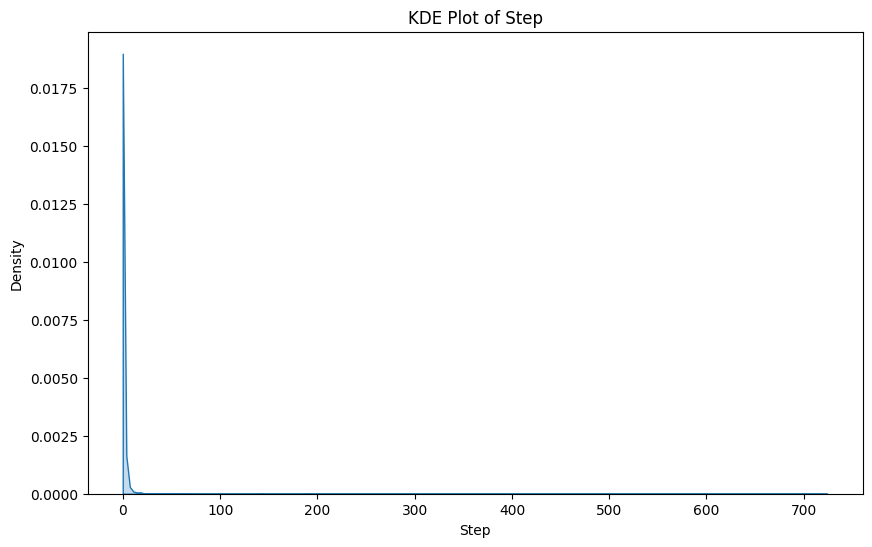

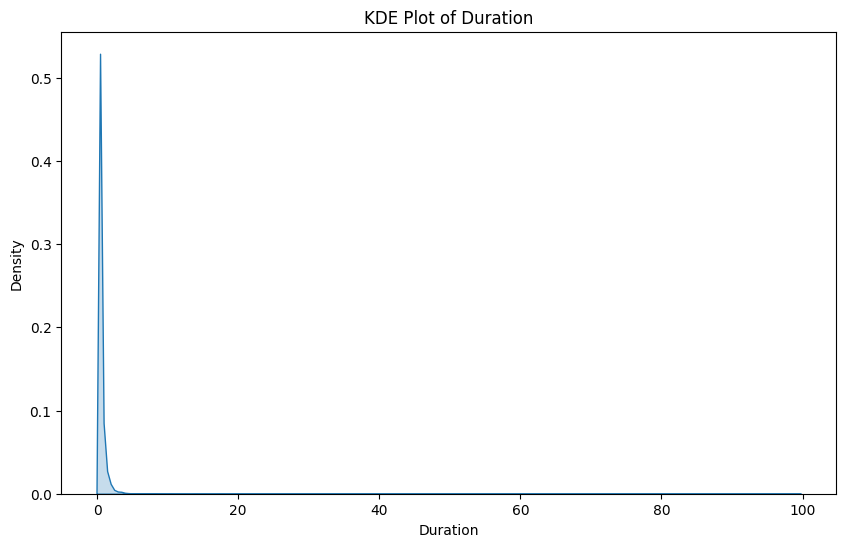

In [12]:
# plot distributions
# Creating a KDE plot for each column
for column in all_notes.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=all_notes, x=column, fill=True)
    plt.title(f'KDE Plot of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Density')
    plt.show()

- So obviously step and duration are significantly positively skewed.. which is expected I believe.

- Check correlation

<Axes: >

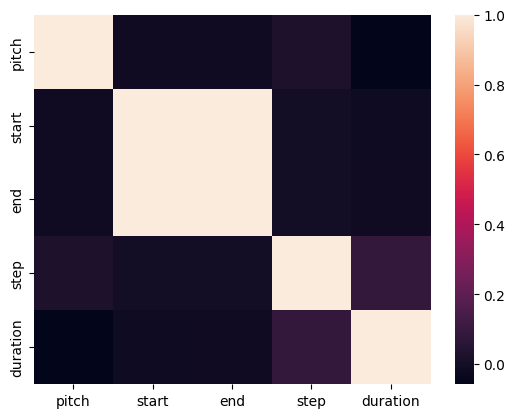

In [5]:
sns.heatmap(all_notes.corr());

- As expected, not much relation between the variables

In [ ]:
all_notes.to_csv('all_notes.csv')

- Copy the dataset to Google Drive

In [ ]:
!cp /content/all_notes.csv '/content/drive/MyDrive/Springboard/Capstone 3/'

In [ ]:
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

Number of notes parsed: 1570367
